In [11]:

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt
from helpers.helpers import *

ceos = pd.read_csv('fortune1000_2023.csv')
ticks = ceos["Ticker"].tolist()
symbol_list = ['AON', "BAH",'CACI','MMC','SPY']
data = yf.download(
    ticks[0:10],
    start='2019-08-30',
    end='2023-08-30'
)['Adj Close']

print(data.head())

[*********************100%%**********************]  10 of 10 completed


1 Failed download:
['BRKA']: Exception('%ticker%: No timezone found, symbol may be delisted')



                          AAPL       AMZN  BRKA        CVS        CVX  \
Date                                                                    
2019-08-30 00:00:00  50.688126  88.814499   NaN  54.141136  97.356094   
2019-09-03 00:00:00  49.949913  89.491997   NaN  53.936741  96.156914   
2019-09-04 00:00:00  50.797394  90.030998   NaN  54.798801  96.967392   
2019-09-05 00:00:00  51.790558  92.036003   NaN  55.776394  97.289932   
2019-09-06 00:00:00  51.785702  91.675499   NaN  55.305367  97.802666   

                         GOOGL         MCK         UNH         WMT        XOM  
Date                                                                           
2019-08-30 00:00:00  59.526501  133.811707  219.692902  107.194054  54.903107  
2019-09-03 00:00:00  58.477501  134.663345  216.519592  107.550552  54.967239  
2019-09-04 00:00:00  59.113499  136.008545  212.867416  108.742020  55.552513  
2019-09-05 00:00:00  60.609501  136.811737  215.552536  108.301071  56.338196  
2019-09

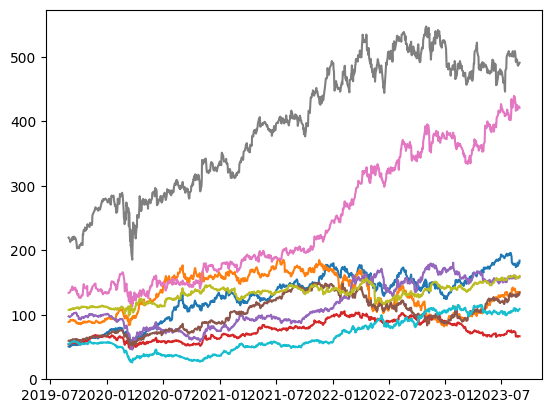

In [4]:
plt.plot(data)
plt.show()

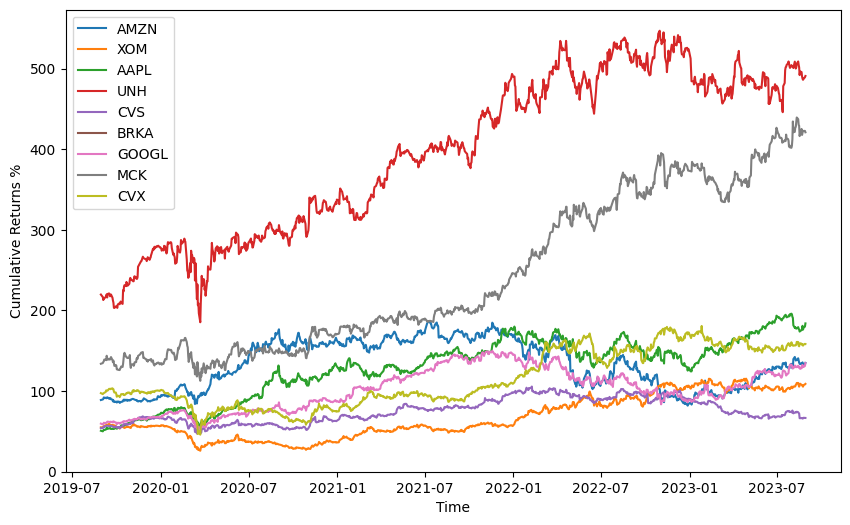

In [5]:
plt.figure(figsize=(10,6))

# Plot the returns
for item in ticks[1:10]:   
    plt.plot(data.loc[:, item], label=item)

# We need to call .legend() to show the legend.
plt.legend()
# Give the axes labels
plt.ylabel('Cumulative Returns %')
plt.xlabel('Time')
plt.show()

In [26]:
test = get_prices_by_ceo_name("Mary T. Barra")
print(test)

[*********************100%%**********************]  18 of 18 completed


1 Failed download:
['GTX']: Exception("%ticker%: Data doesn't exist for startDate = 1358226000, endDate = 1389675600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  18 of 18 completed


1 Failed download:
['GTX']: Exception("%ticker%: Data doesn't exist for startDate = 1389762000, endDate = 1421298000")



[*********************100%%**********************]  1 of 1 completed
(     industry_avg
Day              
0        0.000000
1       -0.639790
2        0.128399
3        0.003029
4        0.129445
..            ...
246     59.721624
247     60.635010
248     60.686088
249     61.948364
250     58.971756

[251 rows x 1 columns],      industry_avg
Day              
0        0.000000
1        0.765286
2        0.109628
3        0.189793
4        1.034083
..            ...
247      7.787109
248      6.136973
249      5.571991
250      4.410441
251      3.388061

[252 rows x 1 columns],      Adj Close
Day           
0     0.000000
1    -4.215690
2    -3.627447
3    -4.313730
4    -6.437905
..         ...
246  31.372590
247  32.091515
248  32.320295
249  30.816981
250  29.346440

[251 rows x 1 columns],      Adj Close
Day           
0     0.000000
1    -0.964954
2    -1.980700
3    -2.640953
4    -1.472824
..         ...
247  -4.825640
248  -6.429415
249  -5.772126
250  -7.323327
251  -9.820

[*********************100%%**********************]  18 of 18 completed


1 Failed download:
['GTX']: Exception("%ticker%: Data doesn't exist for startDate = 1358226000, endDate = 1389675600")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  18 of 18 completed


1 Failed download:
['GTX']: Exception("%ticker%: Data doesn't exist for startDate = 1389762000, endDate = 1421298000")



[*********************100%%**********************]  1 of 1 completed
['Day', 'industry_avg']


<Axes: xlabel='Day'>

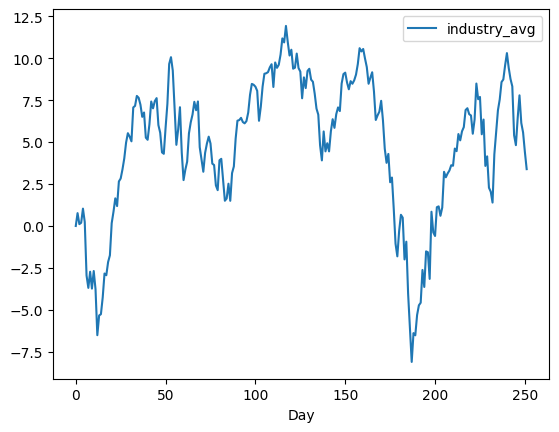

In [23]:
def graph_by_ceo(name):
    graph_data = pd.DataFrame(get_prices_by_ceo_name(name))
    merged_df = pd.merge(graph_data[1], graph_data[2], on='Day', suffixes=('_df1', '_df2'))
    merged_df = pd.merge(merged_df, graph_data[3], on='Day')
    merged_df = pd.merge(merged_df, graph_data[4], on='Day', suffixes=('_df3', '_df4'))

    plt.figure(figsize=(10, 6))

    plt.plot(merged_df['Day'], merged_df['Average_df1'], label='DF1')
    plt.plot(merged_df['Day'], merged_df['Average_df2'], label='DF2')
    plt.plot(merged_df['Day'], merged_df['Average'], label='DF3')
    plt.plot(merged_df['Day'], merged_df['Average_df4'], label='DF4')

test = pd.DataFrame(get_prices_by_ceo_name("Mary T. Barra")[1])
test.reset_index(inplace=True)
print(list(test.columns))
test.plot("Day", "industry_avg")